## Problem statment : 

This case study plant pathology 2020 - detecting the diseased leaf of apple
trees. The foliar disease is due to Bacteria, Fungi, and Viruses. These
diseases can attack leaves and cause spots, complete death and defoliation
of leaves, which will affect the plant's health. The data have, consists of four
types of images healthy leaf, apple rust which is caused by a fungus called
Gymnosporangium juniperi-virginianae, apple scab, which is caused by the
ascomycete fungus Venturia inaequalis, and last one is leaf which contains
two are more diseases. Nowadays the yield of crops is up to mark in terms
of quality and quantity due to many reasons quality of soil, pollution,
fertilizers etc. this results in loss of income and quality of the field. Farmers
are not aware of the diseases and their causes and solution. So, trying some
wrong fungicides can increase cultivation costs, with no improvement in the
recovery from the diseases. To find the disease of the plant farmers need
losing of time and resources like testing and soil and leaf instead of this, we
can create a model which can predict the diseases of the leaf or if it is
healthy. 

[kaggel](https://www.kaggle.com/competitions/plant-pathology-2020-fgvc7/data)

**Metrics :**
1. Accuracy 
2. AUC

**Business constraints**

1. medium level latency requirement.
2. Errors can be very costly.
3. Probability of a data-point belonging to each class is needed.

## Data loading

[data set](https://www.kaggle.com/competitions/plant-pathology-2020-fgvc7/data)

---



In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,te;q=0.8,fr;q=0.7" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/18648/1026645/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1667770154&Signature=Za%2BZq2leL6PyhggTgwTAavNTFyprgqBP8RuKeocxTj02Vm4O08Gs%2FLWgn5Gi6DmPw%2FlqhMG%2FhyBEQ05zmcFR%2FxMu%2FkmEFkWB%2FX6NChlHe4qTDsbB9aqvj9Zb7Sxlm7YpZtYRwWV7iZAqt7XmYe0ZBQkl7UTg7lv6jvDf7KEZpVNWuysAiLOJkkDHhpyitw5gSXU2vjlRsSinGqTz%2FwL5XKI77fpHbAH9JJG9OgFtUUASPzPs0bh754%2B4mqyaQpg3P7b5lpm6ZkNa%2BfL7eBmy3Suwy32B0vKex1d%2FnhhDGWf0xtxzulmOwJbayeMvOvvkSrtxRWrdFfSHsI7GgPQVZg%3D%3D&response-content-disposition=attachment%3B+filename%3Dplant-pathology-2020-fgvc7.zip" -c -O 'plant-pathology-2020-fgvc7.zip'

--2022-11-03 21:29:34--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/18648/1026645/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1667770154&Signature=Za%2BZq2leL6PyhggTgwTAavNTFyprgqBP8RuKeocxTj02Vm4O08Gs%2FLWgn5Gi6DmPw%2FlqhMG%2FhyBEQ05zmcFR%2FxMu%2FkmEFkWB%2FX6NChlHe4qTDsbB9aqvj9Zb7Sxlm7YpZtYRwWV7iZAqt7XmYe0ZBQkl7UTg7lv6jvDf7KEZpVNWuysAiLOJkkDHhpyitw5gSXU2vjlRsSinGqTz%2FwL5XKI77fpHbAH9JJG9OgFtUUASPzPs0bh754%2B4mqyaQpg3P7b5lpm6ZkNa%2BfL7eBmy3Suwy32B0vKex1d%2FnhhDGWf0xtxzulmOwJbayeMvOvvkSrtxRWrdFfSHsI7GgPQVZg%3D%3D&response-content-disposition=attachment%3B+filename%3Dplant-pathology-2020-fgvc7.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 817072693 (779M) [application/zip]
Saving to: ‘plant-pathology-2

In [ ]:
!unzip /content/plant-pathology-2020-fgvc7.zip

Archive:  /content/plant-pathology-2020-fgvc7.zip
  inflating: images/Test_0.jpg       
  inflating: images/Test_1.jpg       
  inflating: images/Test_10.jpg      
  inflating: images/Test_100.jpg     
  inflating: images/Test_1000.jpg    
  inflating: images/Test_1001.jpg    
  inflating: images/Test_1002.jpg    
  inflating: images/Test_1003.jpg    
  inflating: images/Test_1004.jpg    
  inflating: images/Test_1005.jpg    
  inflating: images/Test_1006.jpg    
  inflating: images/Test_1007.jpg    
  inflating: images/Test_1008.jpg    
  inflating: images/Test_1009.jpg    
  inflating: images/Test_101.jpg     
  inflating: images/Test_1010.jpg    
  inflating: images/Test_1011.jpg    
  inflating: images/Test_1012.jpg    
  inflating: images/Test_1013.jpg    
  inflating: images/Test_1014.jpg    
  inflating: images/Test_1015.jpg    
  inflating: images/Test_1016.jpg    
  inflating: images/Test_1017.jpg    
  inflating: images/Test_1018.jpg    
  inflating: images/Test_1019.jpg    


In [ ]:
import pandas as pd
df = pd.read_csv('/content/train.csv')
df.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [ ]:
df["image_id"] = '/content/images/'+ df["image_id"]+'.jpg'

In [ ]:
import numpy as np
conditions = [
    (df['scab'] == 0) & (df['healthy'] == 0) & (df['multiple_diseases'] == 0) & (df['rust'] == 1),
    (df['scab'] == 0) & (df['healthy'] == 0) & (df['multiple_diseases'] == 1) & (df['rust'] == 0),
    (df['scab'] == 0) & (df['healthy'] == 1) & (df['multiple_diseases'] == 0) & (df['rust'] == 0),
    (df['scab'] == 1) & (df['healthy'] == 0) & (df['multiple_diseases'] == 0) & (df['rust'] == 0)]
choices = ['rust', 'multiple_diseases', 'healthy','scab']
df['class'] = np.select(conditions, choices)
df.head()

,image_id,healthy,multiple_diseases,rust,scab,class
0,/content/images/Train_0.jpg,0,0,0,1,scab
1,/content/images/Train_1.jpg,0,1,0,0,multiple_diseases
2,/content/images/Train_2.jpg,1,0,0,0,healthy
3,/content/images/Train_3.jpg,0,0,1,0,rust
4,/content/images/Train_4.jpg,1,0,0,0,healthy


**observation :** 
1. data set has image_id whose naming is train_n and test_n where n is no of images  
2. output class is a multi-class classification where there four classes healthy,multiple_diseases, rust, and scab which are like one hot encoded
3. we have to train and test CSVs when have to submit the test file in Kaggle after performing the best prediction 

## EDA

In [ ]:
df.describe()

,healthy,multiple_diseases,rust,scab
count,1821.000000,1821.000000,1821.000000,1821.000000
mean,0.283361,0.049973,0.341571,0.325096
std,0.450754,0.217948,0.474367,0.468539
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.sum(axis = 0, skipna = True)

image_id             /content/images/Train_0.jpg/content/images/Tra...
healthy                                                            516
multiple_diseases                                                   91
rust                                                               622
scab                                                               592
class                scabmultiple_diseaseshealthyrusthealthyhealthy...
dtype: object

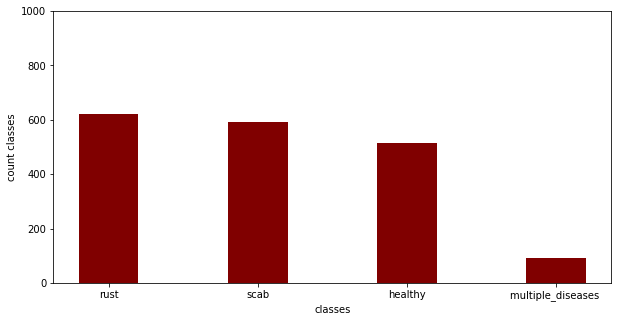

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data = {'rust':622, 'scab':592, 'healthy':516,
        'multiple_diseases ':91}
classes = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5)) 
plt.bar(classes, values, color ='maroon',width = 0.4)
plt.ylim(0,1000)
plt.xlabel("classes")
plt.ylabel("count classes")
plt.show()

**observations :** 
1. we found the total image in the training dataset is 1821
among them, 
2. all the classes of rust leaf disease images are more 622
3. similarly, scab leaf disease with 592 and healthy leaves are 516
4. The last class which is multiple_diseases leaf 91 which makes this data set imbalance


SCAB leaf

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
f, axarr = plt.subplots(1,4,figsize=(100,300)) 
axarr[0].imshow(mpimg.imread('/content/images/Train_0.jpg'))
axarr[1].imshow(mpimg.imread('/content/images/Train_7.jpg'))
axarr[2].imshow(mpimg.imread('/content/images/Train_8.jpg'))
axarr[3].imshow(mpimg.imread('/content/images/Train_11.jpg'))

Output hidden; open in https://colab.research.google.com to view.

rust

In [11]:
f, axarr = plt.subplots(1,4,figsize=(100,300)) 
axarr[0].imshow(mpimg.imread('/content/images/Train_3.jpg'))
axarr[1].imshow(mpimg.imread('/content/images/Train_10.jpg'))
axarr[2].imshow(mpimg.imread('/content/images/Train_14.jpg'))
axarr[3].imshow(mpimg.imread('/content/images/Train_15.jpg'))

Output hidden; open in https://colab.research.google.com to view.

multiple diseases

In [12]:
f, axarr = plt.subplots(1,4,figsize=(100,300)) 
axarr[0].imshow(mpimg.imread('/content/images/Train_1.jpg'))
axarr[1].imshow(mpimg.imread('/content/images/Train_62.jpg'))
axarr[2].imshow(mpimg.imread('/content/images/Train_25.jpg'))
axarr[3].imshow(mpimg.imread('/content/images/Train_95.jpg'))

Output hidden; open in https://colab.research.google.com to view.

healthy

In [13]:
f, axarr = plt.subplots(1,4,figsize=(100,300)) 
axarr[0].imshow(mpimg.imread('/content/images/Train_2.jpg'))
axarr[1].imshow(mpimg.imread('/content/images/Train_4.jpg'))
axarr[2].imshow(mpimg.imread('/content/images/Train_5.jpg'))
axarr[3].imshow(mpimg.imread('/content/images/Train_9.jpg'))

Output hidden; open in https://colab.research.google.com to view.

**observation :**
observation from the above images 
1. health leaf: look green in colour have the complete shape 
2. rust leaf: having some yellow spots on the leaf and shape is also good 
3. scab leaf: having some brown spots on the leaf and shape is also good 
4. multiple diseases: it has yellow and browns spots and the shape of the leaf is not good means most of the leaf is eaten by fungi or  bacteria

In [ ]:
from PIL import Image
from tqdm import tqdm
import cv2
import numpy as np
width,height,red,green,blue=[],[],[],[],[]
for filepath in tqdm(df["image_id"]): 
  img = Image.open(filepath)
  img1 = cv2.imread(filepath)
  width.append(img.width)
  height.append(img.height)
  red.append(np.mean(img1[:,:,0]))
  green.append(np.mean(img1[:,:,1]))
  blue.append(np.mean(img1[:,:,2]))
df_vis = pd.DataFrame() 
df_vis["width"] = width
df_vis["height"] = height
df_vis["red"] = red
df_vis["green"] = green
df_vis["blue"] = blue
df_vis["class"] = df['class']

100%|██████████| 1821/1821 [01:25<00:00, 21.28it/s]


In [ ]:
df_vis.describe()

,width,height,red,green,blue
count,1821.000000,1821.000000,1821.000000,1821.000000,1821.000000
mean,2047.249863,1365.750137,79.800055,130.782187,102.968349
std,22.628793,22.628793,17.236150,15.450850,16.289842
min,1365.000000,1365.000000,34.316186,74.126079,39.308978
25%,2048.000000,1365.000000,67.316280,120.953038,92.094195
50%,2048.000000,1365.000000,79.656877,131.609015,101.824397
75%,2048.000000,1365.000000,91.929320,141.301023,113.125566
max,2048.000000,2048.000000,135.957517,174.432178,161.434735


In [ ]:
print("0.5th percentile of width : ",np.percentile(df_vis["width"], 0.5))
print("1th percentile of width : ",np.percentile(df_vis["width"], 1))
print("3th percentile of width : ",np.percentile(df_vis["width"], 3))
print("5th percentile of width : ",np.percentile(df_vis["width"],5))
print("10th percentile of width : ",np.percentile(df_vis["width"], 10))

0.5th percentile of width :  2048.0
1th percentile of width :  2048.0
3th percentile of width :  2048.0
5th percentile of width :  2048.0
10th percentile of width :  2048.0


In [ ]:
print("80 th percentile of width : ",np.percentile(df_vis["height"], 80))
print("90 th percentile of width : ",np.percentile(df_vis["height"], 90))
print("95 th percentile of width : ",np.percentile(df_vis["height"], 95))
print("97 th percentile of width : ",np.percentile(df_vis["height"],97))
print("99 th percentile of width : ",np.percentile(df_vis["height"], 99))
print("99 th percentile of width : ",np.percentile(df_vis["height"], 99.5))

80 th percentile of width :  1365.0
90 th percentile of width :  1365.0
95 th percentile of width :  1365.0
97 th percentile of width :  1365.0
99 th percentile of width :  1365.0
99 th percentile of width :  1365.0


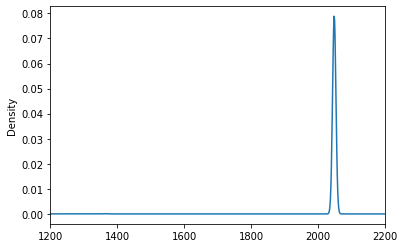

In [ ]:
df_vis["width"].plot(kind='kde',xlim=(1200,2200))

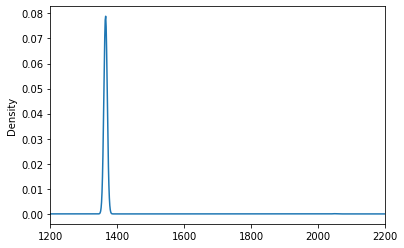

In [ ]:
df_vis["height"].plot(kind='kde',xlim=(1200,2200))

observation : 

1. width from the pdf and percentile 100 have 2048 only first 1 % image have 1365
2. height from the pdf and percentile 99 have 1365 only last 1 % image have 2048
3. thus we can rescale the all images into (1365*2048) 
4. All image class size(height&width) look same 

**mean RGB PDF Plots** 

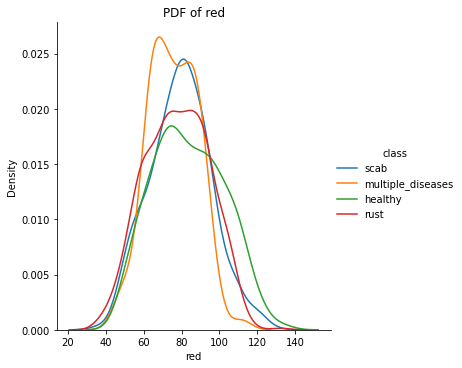

In [ ]:
import seaborn as sns
g = sns.FacetGrid(df_vis, hue="class", height=5)
g.map(sns.kdeplot, "red").add_legend()
plt.title("PDF of red")
plt.show()

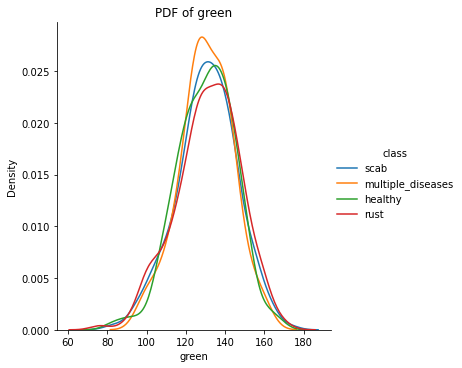

In [ ]:
import seaborn as sns
g = sns.FacetGrid(df_vis, hue="class", height=5)
g.map(sns.kdeplot, "green").add_legend()
plt.title("PDF of green")
plt.show()

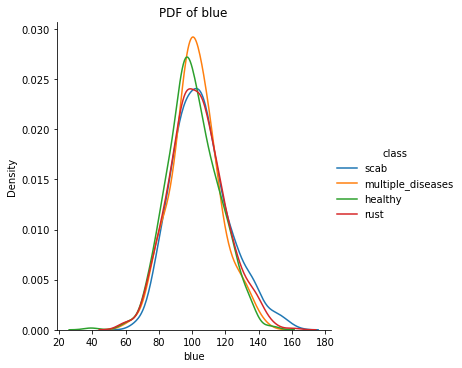

In [ ]:
import seaborn as sns
g = sns.FacetGrid(df_vis, hue="class", height=5)
g.map(sns.kdeplot, "blue").add_legend()
plt.title("PDF of blue")
plt.show()

observations : 
1. mean red channel look better when compare to the othe plots 
2. mean blue channel all classes are overlaped
3. mean green channel all classes are overlaped

**tsne**

In [ ]:
import cv2
import numpy as np
from tqdm import tqdm
pixels = []
for filepath in tqdm(df["image_id"]): 
  img = cv2.imread(filepath)
  res = cv2.resize(img, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)
  pixels.append(res.ravel())

100%|██████████| 1821/1821 [01:14<00:00, 24.34it/s]


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1821 samples in 0.314s...
[t-SNE] Computed neighbors for 1821 samples in 37.040s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1821
[t-SNE] Computed conditional probabilities for sample 1821 / 1821
[t-SNE] Mean sigma: 5419.685698
[t-SNE] KL divergence after 250 iterations with early exaggeration: 106.810776
[t-SNE] KL divergence after 1000 iterations: 2.424735


[(-25.0, 25.0), (-25.0, 25.0), Text(0.5, 1.0, 'T-SNE projection')]

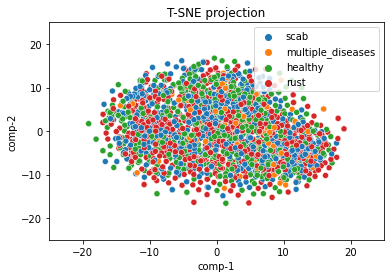

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(pixels)
df1 = pd.DataFrame()
df1["y"] = df['class']
df1["comp-1"] = z[:,0]
df1["comp-2"] = z[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=df1.y.tolist(),
                data=df1).set(title="T-SNE projection",ylim = (-25,25),xlim = (-25,25))

**observation :**
1. we rescaled image into 256*256 
2. applied tsne, we can observed that there small clusters and highly overlaped 
  

**Removing green colour from image**

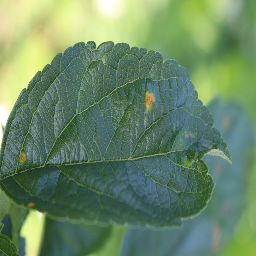

In [ ]:
#taken reference from
#https://stackoverflow.com/questions/58051025/how-to-remove-color-from-image
from google.colab.patches import cv2_imshow
low_green = np.array([25, 52, 72])
high_green = np.array([102, 255, 255])
img = cv2.imread('/content/images/Train_120.jpg')
img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_CUBIC)
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(imgHSV, low_green, high_green)
mask = 255-mask
res = cv2.bitwise_and(img, img, mask=mask)
cv2_imshow(img)

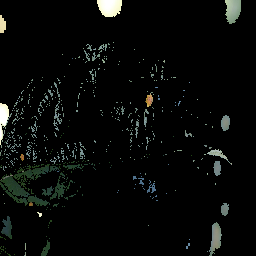

In [ ]:
cv2_imshow(res)

[(-30.0, 30.0), (-30.0, 30.0), Text(0.5, 1.0, 'T-SNE projection')]

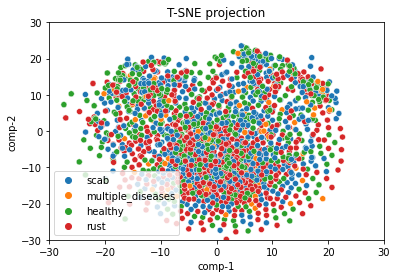

In [ ]:
low_green = np.array([25, 52, 72])
high_green = np.array([102, 255, 255])
pixels = []
for filepath in tqdm(df["image_id"]): 
  img = cv2.imread(filepath)
  img = cv2.resize(img, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)
  imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  mask = cv2.inRange(imgHSV, low_green, high_green)
  mask = 255-mask
  res = cv2.bitwise_and(img, img, mask=mask)
  pixels.append(res[:, :, ].ravel())
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(pixels)
df1 = pd.DataFrame()
df1["y"] = df['class']
df1["comp-1"] = z[:,0]
df1["comp-2"] = z[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=df1.y.tolist(),
                data=df1).set(title="T-SNE projection",ylim = (-30,30),xlim = (-30,30))



**observation :**
1. we have removed green colour from image 
2. then applied tsne we see that is looking better than above 